In [1]:
from tifffile import imread
import os, glob
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')
logging.info('test')

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

03:06:14 INFO:test


In [2]:
colors = {'MES-like': 'pink',
 'DC': (0.6823529411764706,0.7803921568627451,0.9098039215686274,1.0),
 'CD4/CD8': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 'Endothelial': (1.0, 0.7333333333333333, 0.47058823529411764, 1.0),
 'Astrocyte': (0.17254901960784313,0.6274509803921569,0.17254901960784313,1.0),
 'AC-like': '#447c69',
 'Mast': (1.0, 0.596078431372549, 0.5882352941176471, 1.0),
 'Mono': (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 'Mural cell': (0.7725490196078432,0.6901960784313725,0.8352941176470589,1.0),
 'NK': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 'NPC-like': '#5384db',
 'OPC-like': '#9cba19',
 'RG': '#9e1f63',
 'TAM-BDM': (0.4580392156862745, 0.4580392156862745, 0.4580392156862745, 1.0),
 'OPC': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
 'Oligodendrocyte': (0.8588235294117647, 0.8588235294117647, 0.5529411764705883, 1.0),
 'TAM-MG': (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)}


/home/camiel/anaconda3/envs/embryoscope2/lib/python3.10/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


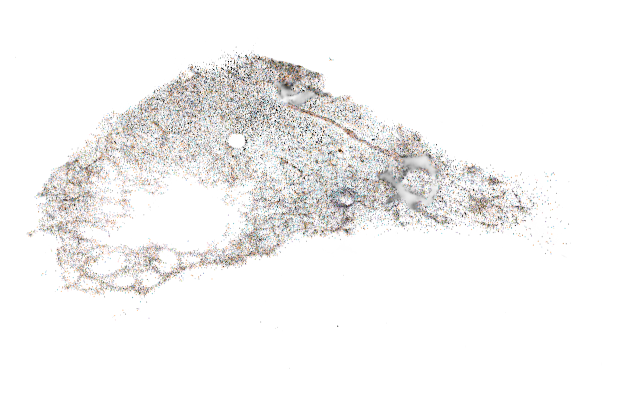

In [3]:
path_adata = '/date/sl/embryoscope/folder_shared/Xenium_anndata/'
adata = sc.read_h5ad(path_adata + 'GBM_annotated.h5ad')

key = 'annotation_level_3'
im_nuc = imread('data/EV39_xenium_nuc.ome.tif')
bg_mask = im_nuc == np.min(im_nuc)
mn = np.min(im_nuc[~bg_mask])
im_nuc[bg_mask] = mn

fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.imshow(im_nuc, cmap='Greys', vmax=np.quantile(im_nuc.flatten(), .9975))

tissue=adata[adata.obs['replicate']=='EV39_TL_A']
s = 100 / np.sqrt(tissue.shape[0])

X,Y = tissue.obs['X'], tissue.obs['Y']
ax.scatter(X,Y, s=s, c=[colors[x] for x in tissue.obs[key]], lw=0, alpha=.5)
ax.set_aspect('equal')
ax.axis('off')
ax.invert_yaxis()
ax.invert_xaxis()

## Tracks on GBMap

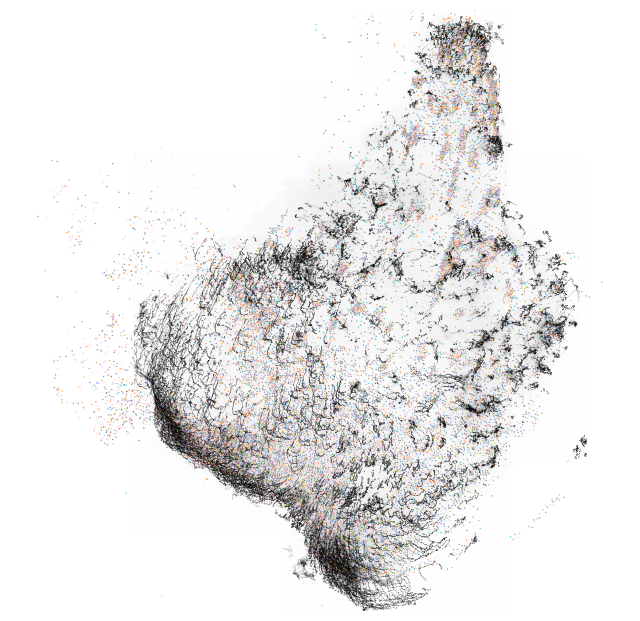

In [4]:
s = 1
im = imread('data/EV37_last_timestep.tif')
bg_mask = im == np.min(im)
mn = np.min(im[~bg_mask])
im[bg_mask] = mn

tracks = np.load('data/EV37_tracks.npy')
tissue=adata[adata.obs['replicate']=='EV37_TL']

plt.figure(figsize=(8,8))
plt.imshow(im, cmap='Greys')

X,Y = tissue.obs['X_transformed'], tissue.obs['Y_transformed']
labels = tissue.obs['annotation_level_3']

plt.scatter(X,Y, s=s, c=[colors[x] for x in labels], alpha=.75, lw=0);
plt.axis('off');

t = tracks.shape[-1]
for i in range(tracks.shape[0]):
    xy = tracks[i,:,:].reshape([2,t])
    valid = xy[1,:] > 0
    plt.plot(xy[1,valid], xy[0,valid], c='Black', lw=.15, alpha=.5)

plt.ylim((im.shape[0],0))
plt.gca().set_aspect('equal')

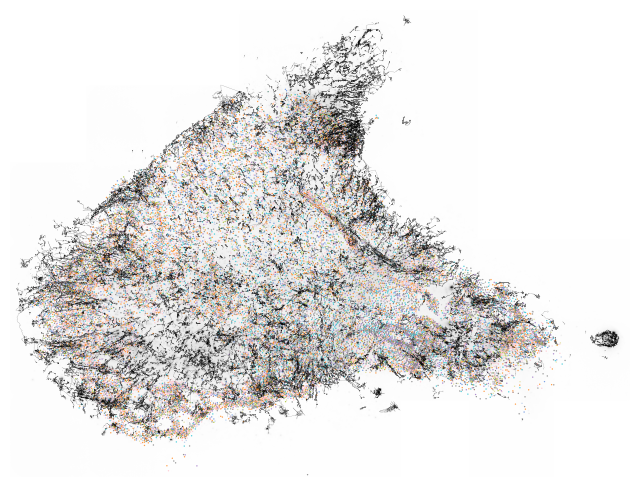

In [5]:
s = 1
im = imread('data/EV39_last_timestep.tif')
bg_mask = im == np.min(im)
mn = np.min(im[~bg_mask])
im[bg_mask] = mn

tracks = np.load('data/EV39_tracks.npy')
tissue=adata[adata.obs['replicate']=='EV39_TL_A']

plt.figure(figsize=(8,8))
plt.imshow(im, cmap='Greys')

X,Y = tissue.obs['X_transformed'], tissue.obs['Y_transformed']
labels = tissue.obs['annotation_level_3']

plt.scatter(X,Y, s=s, c=[colors[x] for x in labels], alpha=.75, lw=0);
plt.axis('off');

t = tracks.shape[-1]
for i in range(tracks.shape[0]):
    xy = tracks[i,:,:].reshape([2,t])
    valid = xy[1,:] > 0
    plt.plot(xy[1,valid], xy[0,valid], c='Black', lw=.15, alpha=.5)

plt.ylim((im.shape[0],0))
plt.gca().set_aspect('equal')

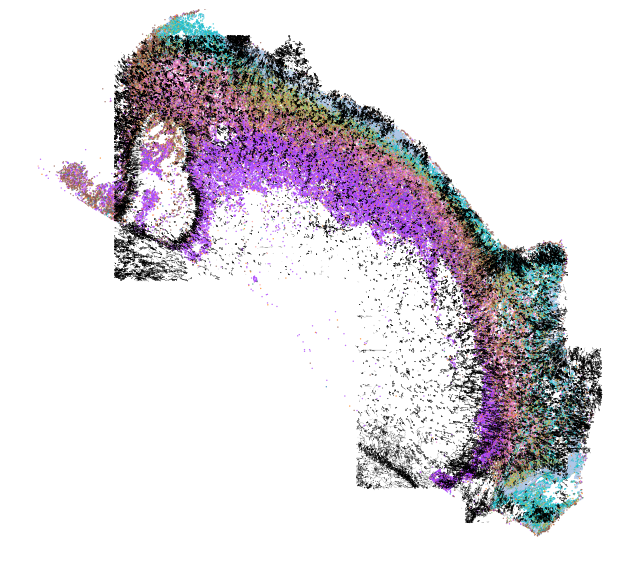

In [6]:
adata_cortex = sc.read_h5ad(path_adata + 'Cortex.h5ad')

cmap = {'10_OPC': '#1f77b4',
 '11_Immune': '#ff7f0e',
 '12_MIC': '#279e68',
 '13_PVM': '#d62728',
 '1_Glioblast': '#aa40fc',
 '2_Glioblast': '#8c564b',
 '3_Glioblast': '#e377c2',
 '4_Neuroblast': '#b5bd61',
 '5_Neuroblast': '#17becf',
 '6_Neur_deep_layer': '#aec7e8',
 '7_INH_SST': '#ffbb78',
 '8_Cycling': '#98df8a',
 '9_INH_PVALB': '#ff9896'}

im = imread('data/EV38_last_timestep.tif')
bg_mask = im == np.min(im)
mn = np.min(im[~bg_mask])
im[bg_mask] = mn

tracks = np.load('data/EV38_tracks.npy')

plt.figure(figsize=(8,8))

X,Y = adata_cortex.obs['X_transformed'], adata_cortex.obs['Y_transformed']
plt.scatter(X,Y, c=[cmap[x] for x in adata_cortex.obs['Annotation']], lw=0, s=s, alpha=.75);

t = tracks.shape[-1]
for i in range(tracks.shape[0]):
    xy = tracks[i,:,:].reshape([2,t])
    valid = xy[1,:] > 0
    plt.plot(xy[1,valid], xy[0,valid], c='Black', lw=.15, alpha=.5)

plt.ylim((np.max(Y)*1.05, np.min(Y) - (.05*np.min(Y))))
plt.gca().set_aspect('equal')
plt.axis('off');


## Aligned tracks

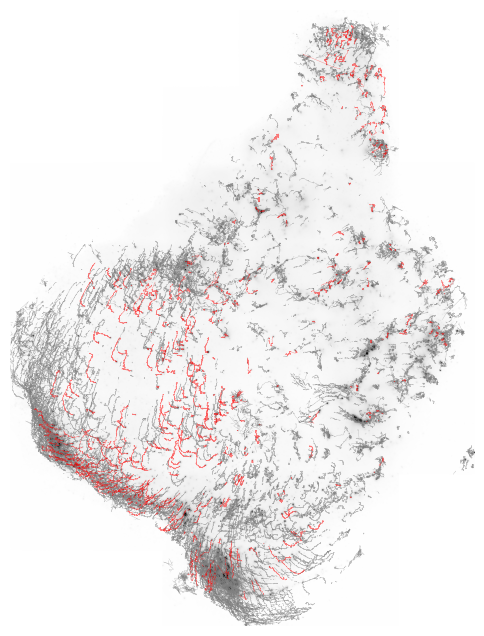

In [7]:
df = pd.read_csv('data/EV37_metrics.csv', header=0)
tracks = np.load('data/EV37_tracks.npy')
im = imread('data/EV37_last_timestep.tif')

bg_mask = im == np.min(im)
mn = np.min(im[~bg_mask])
im[bg_mask] = mn

cmap = {True: 'red',
        False: 'grey'}
c = [cmap[x] for x in df['Aligned_to_Xenium']]

plt.figure(figsize=(8,8))
plt.imshow(im, cmap='Greys')

plt.axis('off');

t = tracks.shape[-1]
for i in range(tracks.shape[0]):
    xy = tracks[i,:,:].reshape([2,t])
    valid = xy[1,:] > 0
    plt.plot(xy[1,valid], xy[0,valid], c=c[i], lw=.25, alpha=.5)

plt.ylim((im.shape[0],0))
plt.gca().set_aspect('equal')

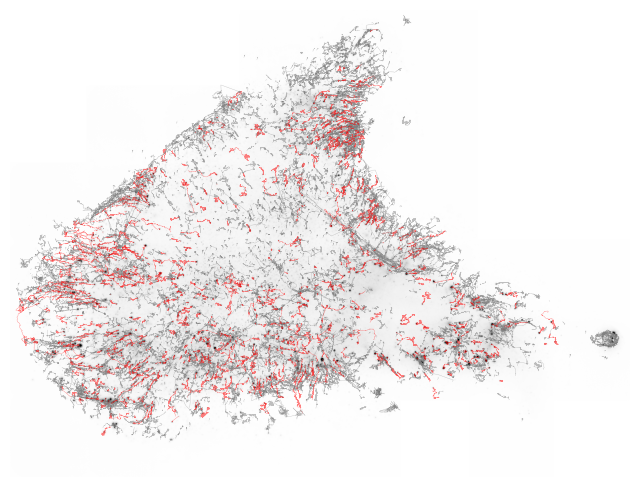

In [8]:
df = pd.read_csv('data/EV39_metrics.csv', header=0)
tracks = np.load('data/EV39_tracks.npy')
im = imread('data/EV39_last_timestep.tif')

bg_mask = im == np.min(im)
mn = np.min(im[~bg_mask])
im[bg_mask] = mn

cmap = {True: 'red',
        False: 'grey'}
c = [cmap[x] for x in df['Aligned_to_Xenium']]

plt.figure(figsize=(8,8))
plt.imshow(im, cmap='Greys')

plt.axis('off');

t = tracks.shape[-1]
for i in range(tracks.shape[0]):
    xy = tracks[i,:,:].reshape([2,t])
    valid = xy[1,:] > 0
    plt.plot(xy[1,valid], xy[0,valid], c=c[i], lw=.25, alpha=.5)

plt.ylim((im.shape[0],0))
plt.gca().set_aspect('equal')

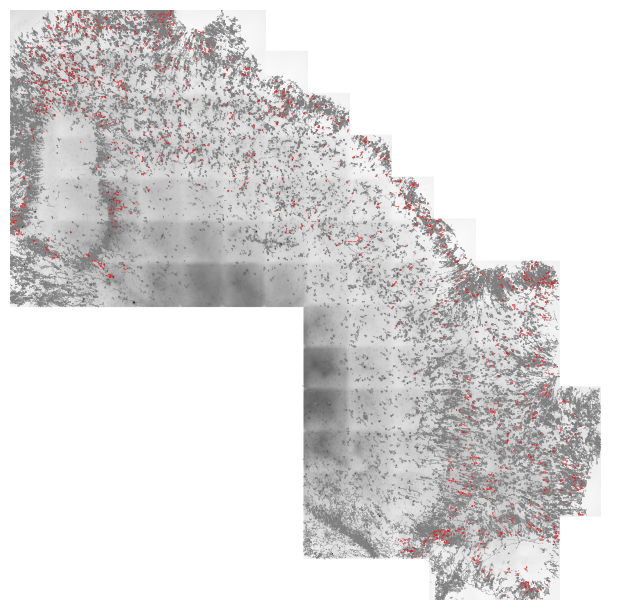

In [9]:
df = pd.read_csv('data/EV38_metrics.csv', header=0)
tracks = np.load('data/EV38_tracks.npy')
im = imread('data/EV38_last_timestep.tif')

bg_mask = im == np.min(im)
mn = np.min(im[~bg_mask])
im[bg_mask] = mn

cmap = {True: 'red',
        False: 'grey'}
c = [cmap[x] for x in df['Aligned_to_Xenium']]

plt.figure(figsize=(8,8))
plt.imshow(im, cmap='Greys')

plt.axis('off');

t = tracks.shape[-1]
for i in range(tracks.shape[0]):
    xy = tracks[i,:,:].reshape([2,t])
    valid = xy[1,:] > 0
    plt.plot(xy[1,valid], xy[0,valid], c=c[i], lw=.25, alpha=.5)

plt.ylim((im.shape[0],0))
plt.gca().set_aspect('equal')

## Aligned cell identites

/home/camiel/anaconda3/envs/embryoscope2/lib/python3.10/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/camiel/anaconda3/envs/embryoscope2/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


Text(0.5, 0, 'Fraction of cells')

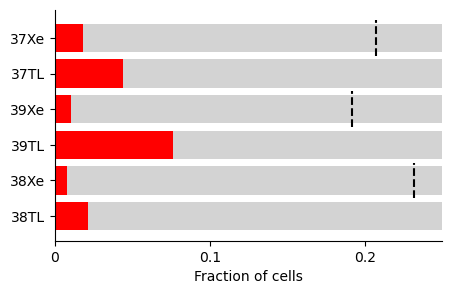

In [10]:
## Aligned cells fractions
path_adata = '/date/sl/embryoscope/folder_shared/Xenium_anndata/'
adata = sc.read_h5ad(path_adata + 'GBM_annotated.h5ad')
adata_cortex = sc.read(path_adata + 'Cortex.h5ad')

cols = ['Red', 'lightgrey']

df = pd.read_csv('data/EV39_metrics.csv', header=0)
EV39_TL = np.array([np.sum(df['Aligned_to_Xenium']), np.sum(~df['Aligned_to_Xenium'])])
df = pd.read_csv('data/EV37_metrics.csv', header=0)
EV37_TL = np.array([np.sum(df['Aligned_to_Xenium']), np.sum(~df['Aligned_to_Xenium'])])
df = pd.read_csv('data/EV38_metrics.csv', header=0)
EV38_TL = np.array([np.sum(df['Aligned_to_Xenium']), np.sum(~df['Aligned_to_Xenium'])])

EV37_Xe = np.array([np.sum((adata.obs.replicate == 'EV37_TL') & adata.obs.timelapse_aligned),
                    np.sum((adata.obs.replicate == 'EV37_TL') & ~adata.obs.timelapse_aligned)])
EV39_Xe = np.array([np.sum(np.array([x in ['EV39_TL_A', 'EV39_TL_B', 'EV39_TL_C'] for x in adata.obs.replicate]) & adata.obs.timelapse_aligned),
                    np.sum(np.array([x in ['EV39_TL_A', 'EV39_TL_B', 'EV39_TL_C'] for x in adata.obs.replicate]) & ~adata.obs.timelapse_aligned)])
EV38_Xe = np.array([np.sum((adata_cortex.obs.replicate == 'EV38_TL_B') & adata_cortex.obs.timelapse_aligned),
                    np.sum((adata_cortex.obs.replicate == 'EV38_TL_B') & ~adata_cortex.obs.timelapse_aligned)])

plt.figure(figsize=(5,3))
bottoms = np.zeros(6).astype('float')

totals = np.array([np.sum(EV38_TL), np.sum(EV38_Xe),
                   np.sum(EV39_TL), np.sum(EV39_Xe), 
                   np.sum(EV37_TL), np.sum(EV37_Xe)])

for i, col in enumerate(cols):
    vals = np.array([EV38_TL[i],
                     EV38_Xe[i],
                     EV39_TL[i],
                     EV39_Xe[i],
                     EV37_TL[i],
                     EV37_Xe[i]
        ])/ totals
     
    plt.barh(np.arange(6), width=vals, left=bottoms, color=col)
    bottoms += vals

plt.plot([.207,.207], [4.5,5.5], ls='--', c='black')
plt.plot([.192,.192], [2.5,3.5], ls='--', c='black')
plt.plot([.232,.232], [0.5,1.5], ls='--', c='black')

plt.xlim([0,.25])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.yticks(np.arange(6),['38TL', '38Xe', '39TL', '39Xe', '37TL', '37Xe'])
plt.xticks([0,.1,.2],[0,.1,.2])
plt.xlabel('Fraction of cells')